In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('global_cancer_patients_2015_2024.csv')

In [5]:
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [8]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Descriptive Analysis

Age

In [11]:
df['Age']

0        71
1        34
2        80
3        40
4        43
         ..
49995    80
49996    40
49997    74
49998    21
49999    22
Name: Age, Length: 50000, dtype: int64

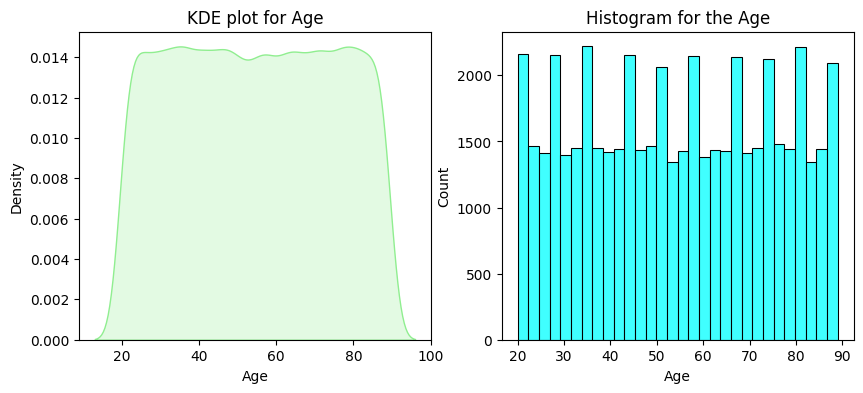

In [12]:
# plotting for age column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(df['Age'], fill=True, color='lightgreen')
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(df['Age'], bins=30, kde=False, color='cyan')
plt.title("Histogram for the Age")

plt.tight_layout
plt.show()

In [13]:
df['Age'].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

Range: 20 to 89 years 

Mean Age: 54.42 years 

Standard Deviation: 20.22 

Interquartile Range (IQR): 37 (Q1) to 72 (Q3) 

This suggests a broad representation of both young and elderly patients in the dataset, which supports age-based comparative analysis. So from the Age column we understood that the data is not skewed and balanced and equally seperated/distributed



Gender

In [ ]:
# Gender is also equally distributed -> good for gender specific insights
df['Gender'].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

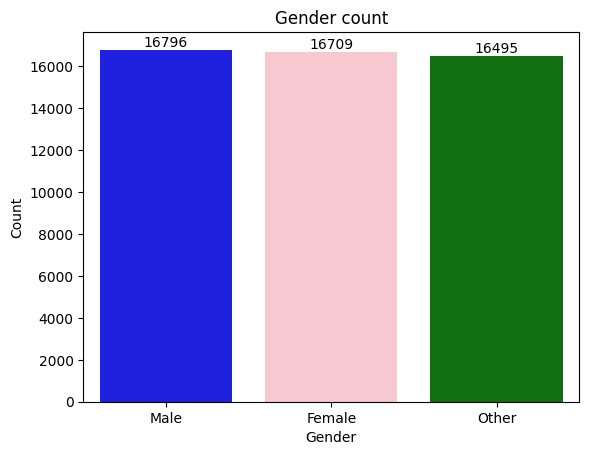

In [21]:
sns.barplot(x= df["Gender"].value_counts().index,
            y= df["Gender"].value_counts().values,
            palette=["blue", "pink", "green"]
           )

for i, v in enumerate(df['Gender'].value_counts()):
    plt.text(i,v, str(v), ha='center', va='bottom')

plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

The dataset contains three gender categories(Male, Female, other) with the most common being Male (16,796 records).
Gender distribution is sufficient for evaluating gender-specific survival trends and severity outcomes.

Countries

In [22]:
df['Country_Region'].value_counts()

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

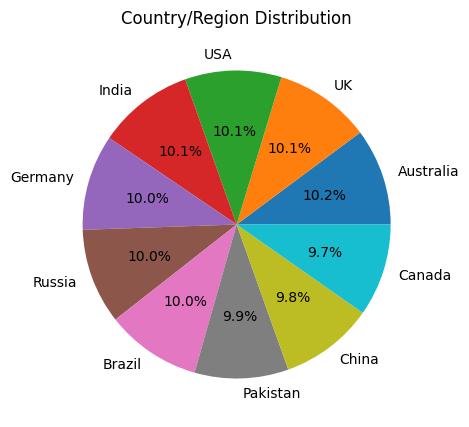

In [26]:
country_counts = df['Country_Region'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values,
        labels=country_counts.index,
        autopct='%1.1f%%')

plt.title('Country/Region Distribution')
plt.show()

Patients come from 10 different countries/regions, with Australia being the most represented (5,092 patients). Number of data points for each country is almost same.
This diversity enables cross-country comparison of cancer outcomes and treatment economic.

Cancer Type

In [27]:
df['Cancer_Type'].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

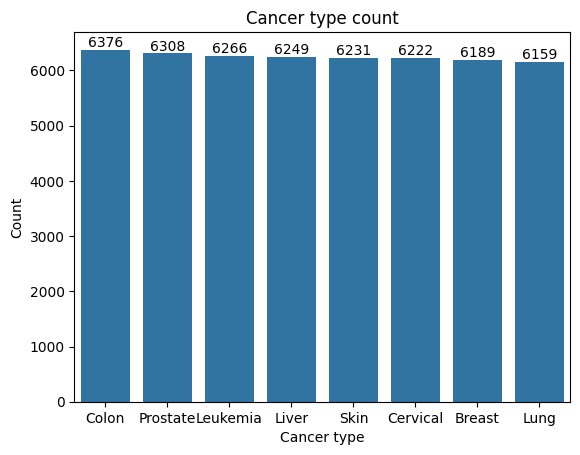

In [29]:
sns.barplot(x=df["Cancer_Type"].value_counts().index,
            y=df["Cancer_Type"].value_counts().values)

for i, v in enumerate(df['Cancer_Type'].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer type count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

We have in total 8 types of cancer , with each cancer having approx same number of data points under the label , most common cnacers are colon cancer followed by Prostate cancer

Cancer Stage

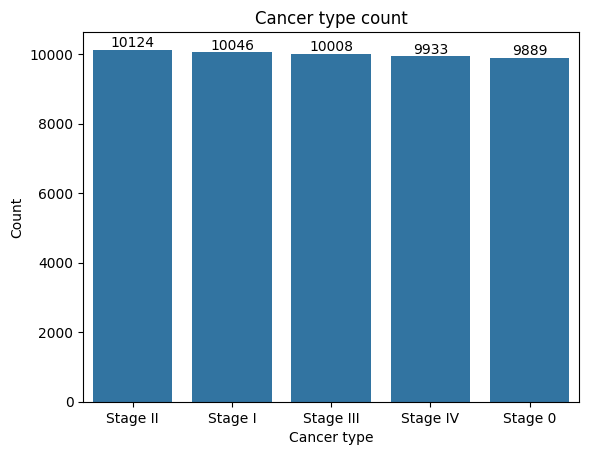

In [30]:
sns.barplot(x=df["Cancer_Stage"].value_counts().index,
            y=df["Cancer_Stage"].value_counts().values)

for i, v in enumerate(df['Cancer_Stage'].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer type count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

Cancer Stage have 5 stages with values ranging from 0 to 4 , with stage 2 the most common one , and each stage have  almost same number of data pointsn under its label.

In [35]:
print(f"Date Ranges from {df['Year'].min()} to {df['Year'].max()}")

Date Ranges from 2015 to 2024


Treatment Cost

In [36]:
df['Treatment_Cost_USD'].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

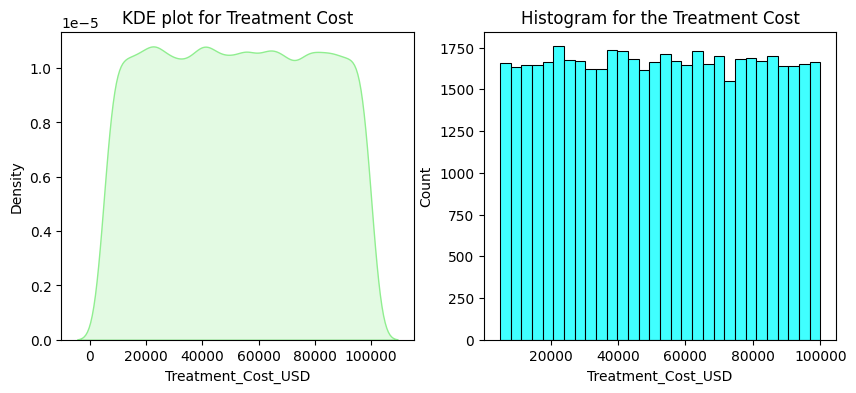

In [ ]:
# plotting for Treatment_Cost_USD column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(df['Treatment_Cost_USD'], fill=True, color='lightgreen')
plt.title("KDE plot for Treatment Cost")

plt.subplot(1,2,2)
sns.histplot(df['Treatment_Cost_USD'], bins=30, kde=False, color='cyan')
plt.title("Histogram for the Treatment Cost")

plt.tight_layout
plt.show()

Treatment cost USD have no skewness , and there are almost same number of data points under each bin as observed by histogram

Analysing all the Risk Factors

In [5]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [8]:
columns_of_interest = ['Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

summary = df[columns_of_interest].agg(['mean','std', "max", "min"])

summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
max,10.000000,10.000000,10.000000,10.000000,10.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000


These variables have nearly identical means and standard deviations, indicating they were likely designed on the same standardized scale. They are essential in studying interaction effects (e.g., genetic risk × smoking) on survival.

### Inferential Analysis

Determine the relationship between risk factors and cancer severity 

In [ ]:
from scipy.stats import linregress

risk_factors = ['Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

titles = ['Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
       
colors= ["blue", "green", "orange", "red", "purple"]

plt.figure(figsize=(20,12))

for i


